## BRAZIL FOREST FIRE ANALYSIS
PREPARED BY : ISHAN NAUTIYAL \
DATE : 21/09/2023 \
DATA : KAGGLE 

In [2]:
# lets import the importatnt libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# get the data and see the datattype of the data 
df1 = pd.read_csv("C:\\Users\\ishan\\datasets\\amazon.csv",encoding='iso-8859-1',parse_dates=['date'])

In [4]:
df1=pd.DataFrame(df1)

In [10]:
df1.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [11]:
df1.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [12]:
df1.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [13]:
df1.shape

(6454, 5)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [15]:
df1.describe(include='all')

C:\Users\ishan\AppData\Local\Temp\ipykernel_11592\146532056.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(include='all')


,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01 00:00:00
freq,NaN,717,541,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN


In [16]:
dup_data = df1.duplicated().any()

In [17]:
dup_data

True

In [18]:
df1= df1.drop_duplicates()

In [19]:
df1.shape

(6422, 5)

In [20]:
df1.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [23]:
df1['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [33]:
df1['month_new']= df1['month'].map({'Janeiro':'jan','Fevereiro':'feb','Março':'mar','Abril':'apr','Maio':'may','Junho':'jun','Julho':'jul','Agosto':'ags','Setembro':'sep','Outubro':'oct','Novembro':'nov','Dezembro':'dec'})

In [25]:
df1.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [26]:
df1.shape

(6422, 6)

In [27]:
df1.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [30]:
data1= df1.groupby('month_new')['number'].sum().reset_index()

In [31]:
data1

,month_new,number
0,ags,88050.435
1,apr,28184.770
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,jul,92319.113
6,jun,55997.675
7,mar,30709.405
8,may,34725.363
9,nov,85508.054


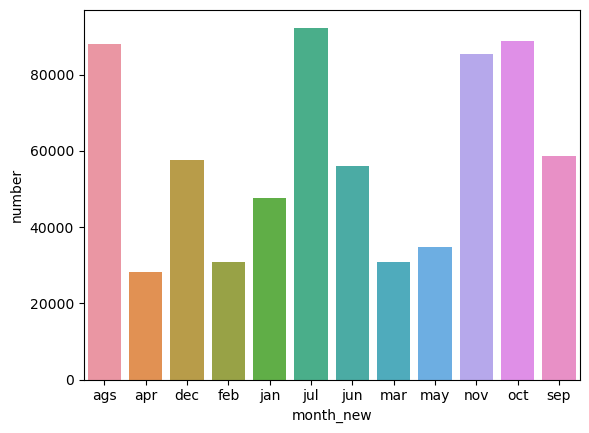

<Figure size 1600x500 with 0 Axes>

In [34]:
sns.barplot(x='month_new',y='number',data=data1)
plt.figure(figsize=(16,5))
plt.show()

In [37]:

data2= df1.groupby('year')['number'].sum().reset_index()

In [38]:
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

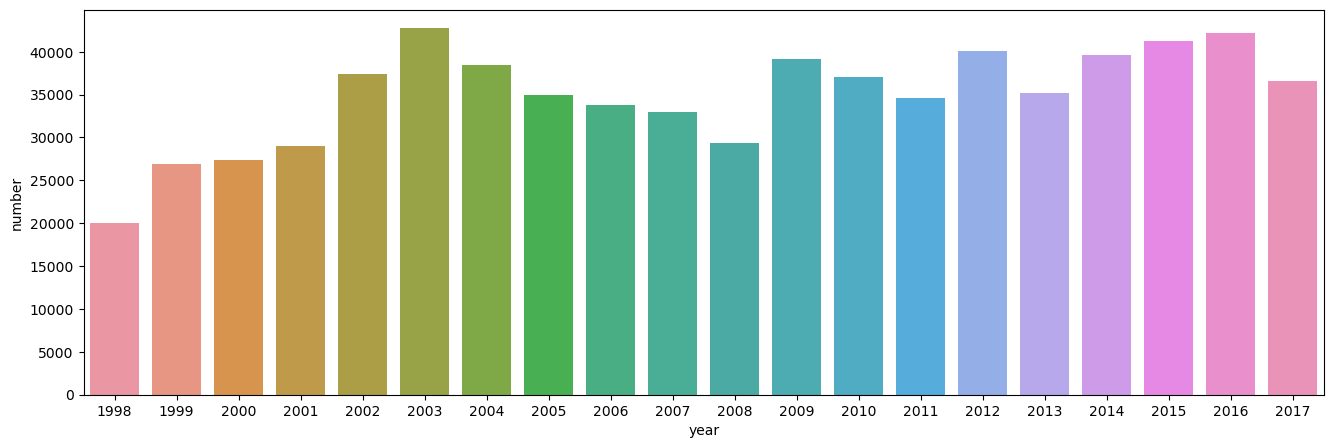

In [39]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data2)

In [5]:
data3 = df1.groupby('state')['number'].sum().sort_values(ascending=False).reset_index()

In [6]:
data3

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52435.918
2,Sao Paulo,51121.198
3,Rio,45160.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


<AxesSubplot:xlabel='state', ylabel='number'>

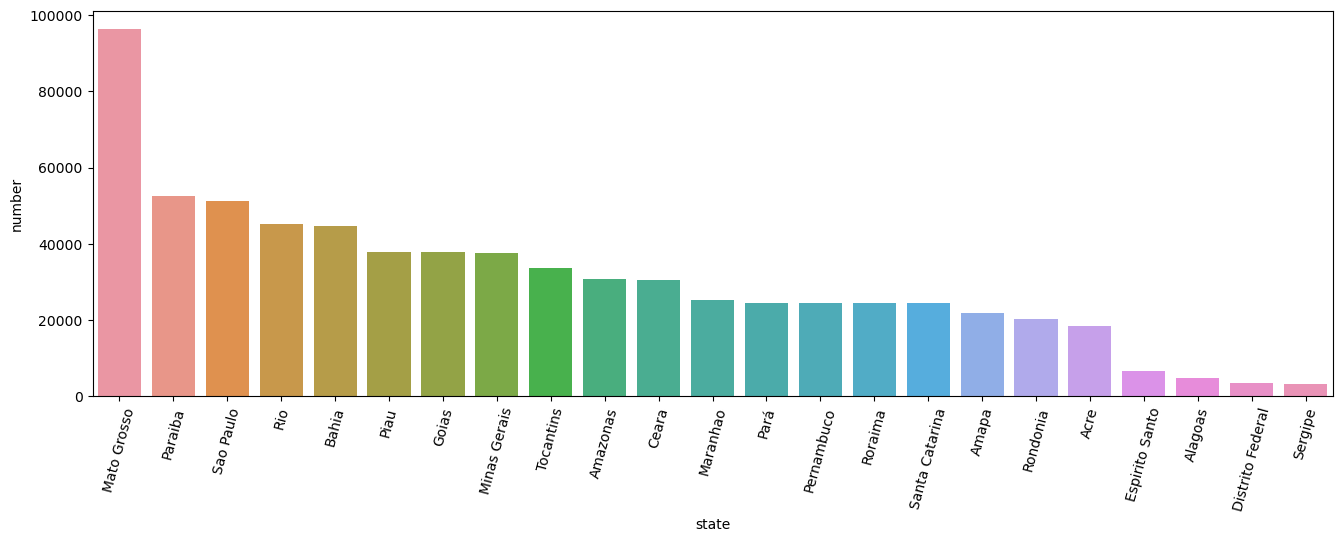

In [12]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=75)
sns.barplot(x='state',y='number',data=data3)

In [15]:
data4=df1[df1['state']=='Amazonas']['number'].sum()

30650.129

In [18]:
data5=df1[df1['state']=='Amazonas']

In [20]:
data6= data5.groupby('year')['number'].sum().reset_index()
data6

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


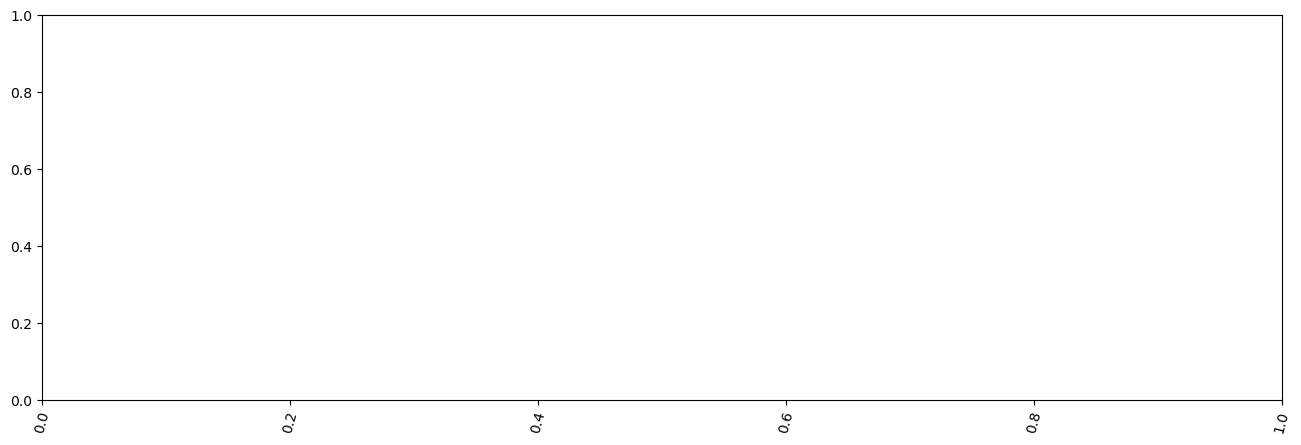

<AxesSubplot:xlabel='year', ylabel='number'>

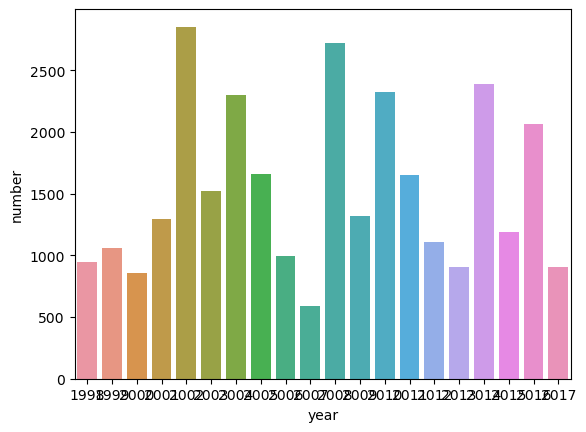

In [23]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=75)
plt.show()
sns.barplot(x='year',y='number',data=data6)

In [24]:
df1.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [26]:
data7=df1.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


<AxesSubplot:xlabel='state', ylabel='number'>

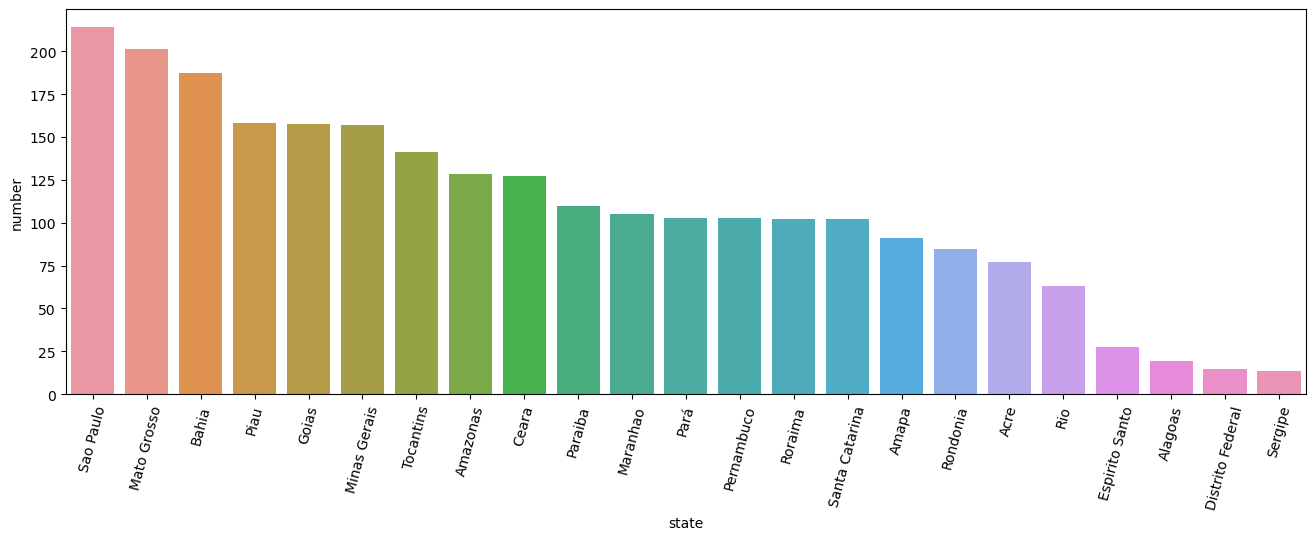

In [27]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=75)
sns.barplot(x='state',y='number',data=data7)

In [34]:
df1.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [35]:
data8=df1[df1['year']==2015]

In [41]:
data8[data8.where(data8['month_new']=='dec').all(1)]['state']

17           Acre
37           Acre
57           Acre
77           Acre
97           Acre
          ...    
6372    Tocantins
6392    Tocantins
6412    Tocantins
6432    Tocantins
6452    Tocantins
Name: state, Length: 323, dtype: object

In [53]:
df1[df1.where(df1['month_new']=='dec').all(1)]

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,dec
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,dec
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,dec
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,dec
